In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('data/cleaned.csv').drop(columns=['Unnamed: 0'])

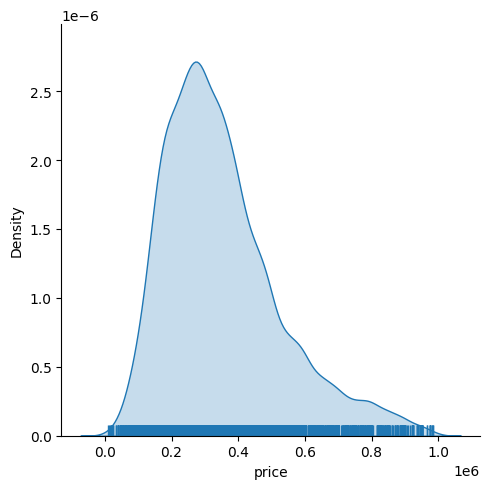

In [4]:
sns.displot(df['price'], rug=True, kind='kde', fill=True)

<Figure size 640x480 with 0 Axes>

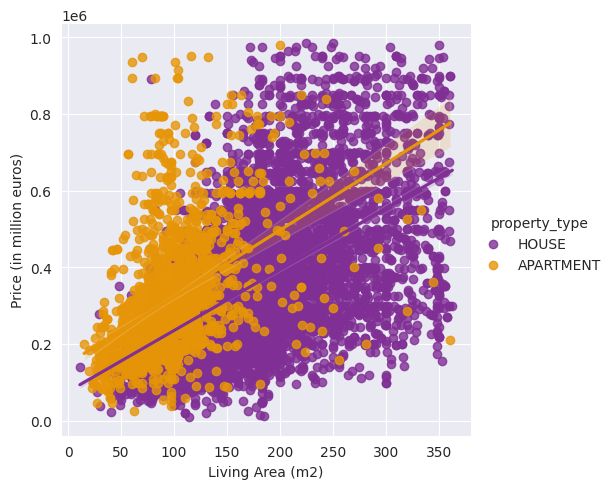

In [5]:
sns.set_style('darkgrid')
sns.despine(left=True)
sns.lmplot(data=df, x='living_area', y='price', hue='property_type', palette='CMRmap').set(xlabel='Living Area (m2)', ylabel='Price (in million euros)')

<Figure size 640x480 with 0 Axes>

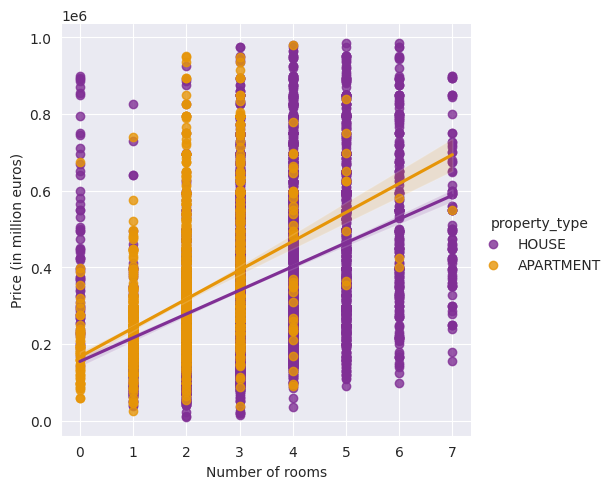

In [6]:
sns.set_style('darkgrid')
sns.despine(left=True)
sns.lmplot(data=df, x='number_rooms', y='price', hue='property_type', palette='CMRmap').set(xlabel='Number of rooms', ylabel='Price (in million euros)')

<Figure size 640x480 with 0 Axes>

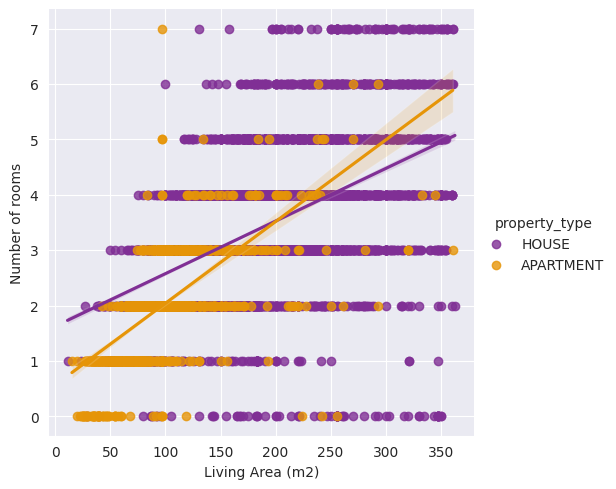

In [7]:
sns.set_style('darkgrid')
sns.despine(left=True)
sns.lmplot(data=df, x='living_area', y='number_rooms', hue='property_type', palette='CMRmap').set(xlabel='Living Area (m2)', ylabel='Number of rooms')

<Figure size 640x480 with 0 Axes>

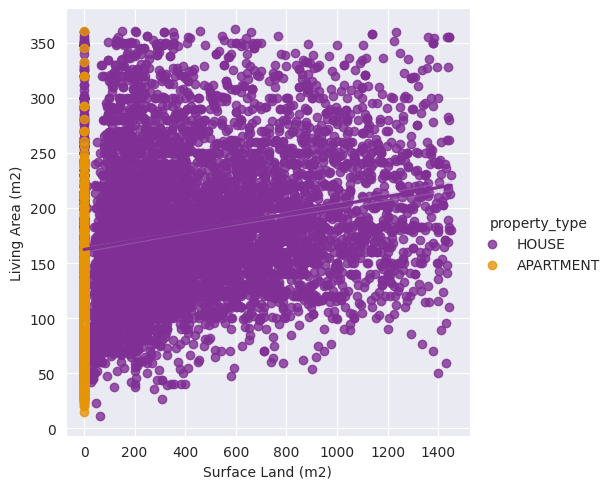

In [37]:
sns.set_style('darkgrid')
sns.despine(left=True)
sns.lmplot(data=df, x='surface_land', y='living_area', hue='property_type', palette='CMRmap').set(xlabel='Surface Land (m2)', ylabel='Living Area (m2)')

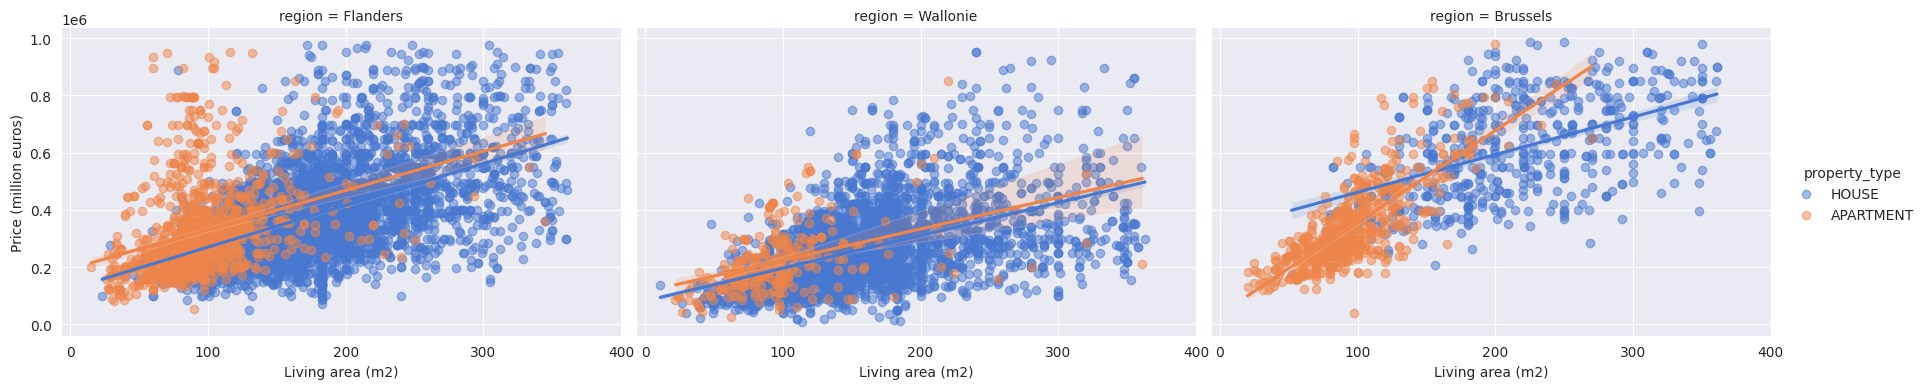

In [9]:

g = sns.FacetGrid(df, col="region", hue="property_type", height=4, aspect=1.5, palette='muted')

g.map(sns.regplot, "living_area", "price", scatter_kws={"alpha": 0.5})
g.set_axis_labels("Living area (m2)", "Price (million euros)")
g.set(xticks=[0, 100, 200, 300, 400])
g.add_legend()

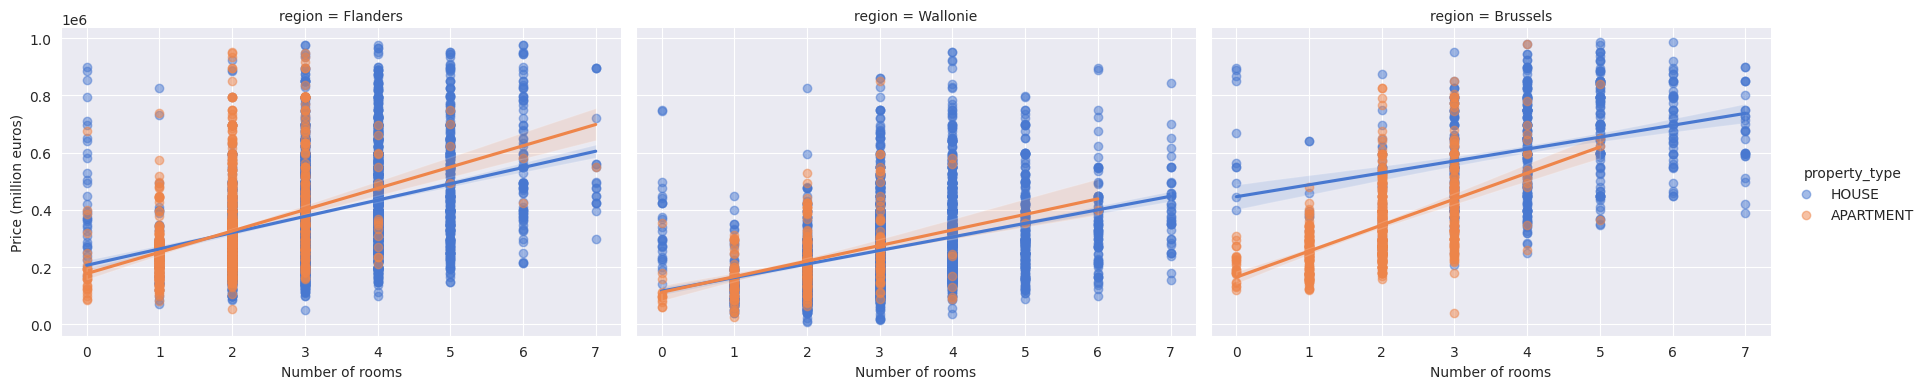

In [10]:
g = sns.FacetGrid(df, col="region", hue="property_type", height=4, aspect=1.5, palette='muted')
g.map(sns.regplot, "number_rooms", "price", scatter_kws={"alpha": 0.5})
g.set_axis_labels("Number of rooms", "Price (million euros)")
g.add_legend()

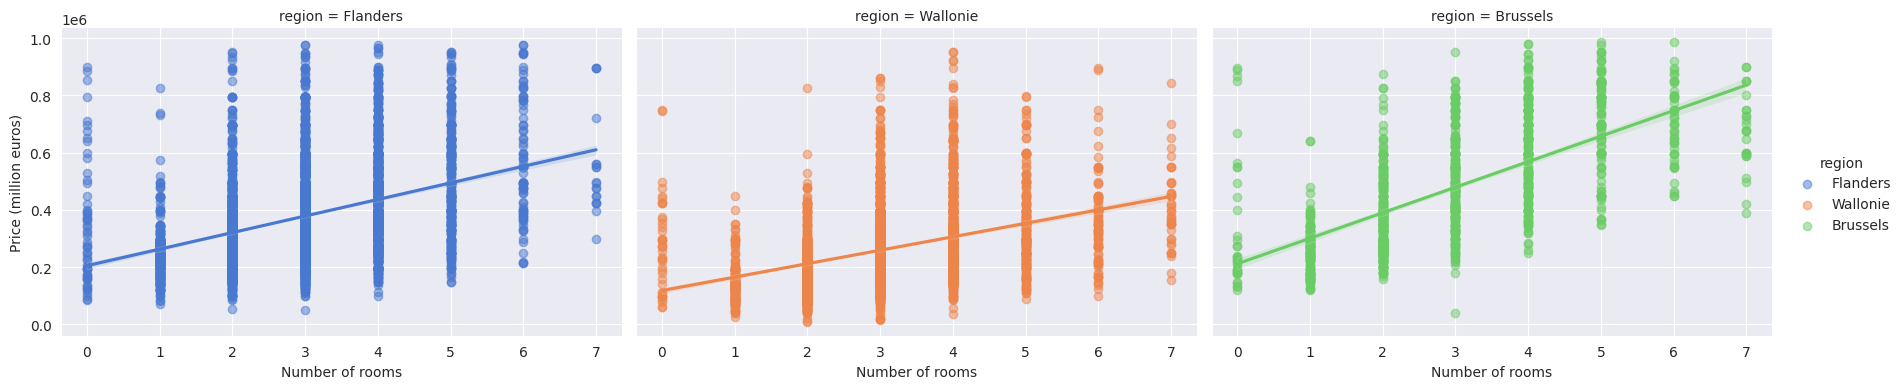

In [11]:
g = sns.FacetGrid(df, col="region", hue="region", height=4, aspect=1.5, palette='muted')
g.map(sns.regplot, "number_rooms", "price", scatter_kws={"alpha": 0.5})
g.set_axis_labels("Number of rooms", "Price (million euros)")
g.add_legend()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9904 entries, 0 to 9903
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          9904 non-null   object 
 1   property_type     9904 non-null   object 
 2   property_subtype  9904 non-null   object 
 3   price             9904 non-null   float64
 4   number_rooms      9904 non-null   float64
 5   living_area       9904 non-null   float64
 6   kitchen           9904 non-null   object 
 7   furnished         9904 non-null   int64  
 8   fireplace         9904 non-null   float64
 9   terrace           9904 non-null   int64  
 10  terrace_area      9904 non-null   float64
 11  garden            9904 non-null   int64  
 12  garden_area       9904 non-null   float64
 13  surface_land      9904 non-null   float64
 14  number_facades    9904 non-null   float64
 15  swimming_pool     9904 non-null   int64  
 16  building_state    9904 non-null   object 


In [13]:
df.head()

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
0,Ham,HOUSE,HOUSE,399500.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,461.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
1,Ham,HOUSE,HOUSE,381000.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,343.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
2,Ham,HOUSE,HOUSE,393500.0,3.0,192.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,392.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
3,Ham,HOUSE,HOUSE,315000.0,3.0,197.0,NOT_INSTALLED,0,0.0,0,...,0,0.0,509.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
4,Ham,HOUSE,HOUSE,305000.0,3.0,195.0,NOT_INSTALLED,0,0.0,0,...,0,0.0,453.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303


In [14]:
len(df.columns)

21

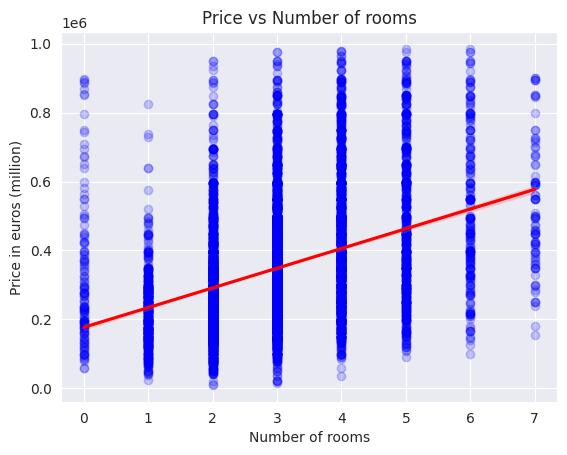

In [15]:
import matplotlib.pyplot as plt

sns.regplot(df, x='number_rooms', y='price', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Price vs Number of rooms')
plt.ylabel('Price in euros (million)')
plt.xlabel('Number of rooms')
sns.set_style('darkgrid')

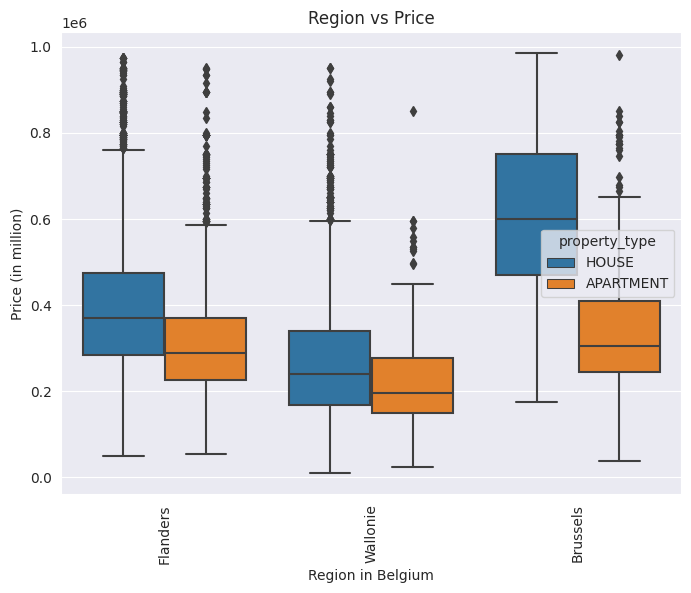

In [39]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'region', y = 'price',  data = df,ax=ax, hue='property_type')
plt.title('Region vs Price')
plt.xlabel('Region in Belgium')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)



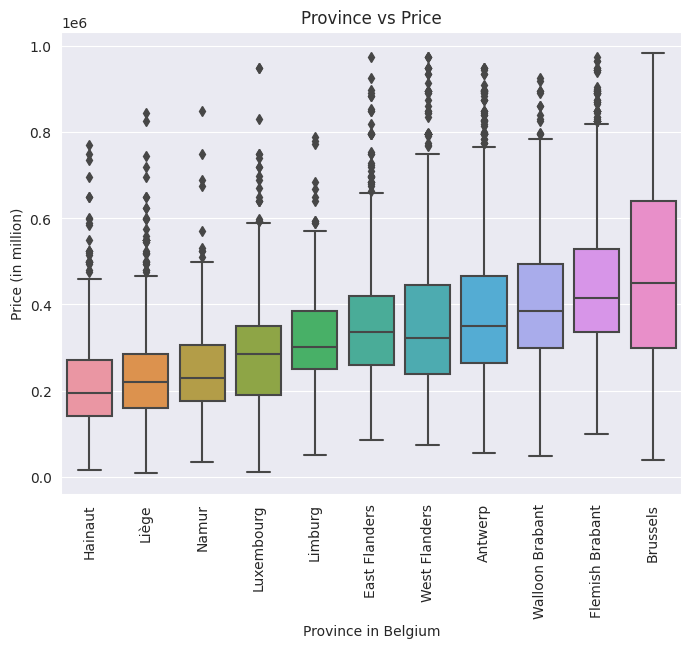

In [17]:
mean_prices = df.groupby('province')['price'].mean().sort_values(ascending=True)
sorted_categories = mean_prices.index.tolist()
df['province'] = pd.Categorical(df['province'], categories=sorted_categories, ordered=True)

fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'province', y = 'price',  data = df,ax=ax)
plt.title('Province vs Price')
plt.xlabel('Province in Belgium')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)



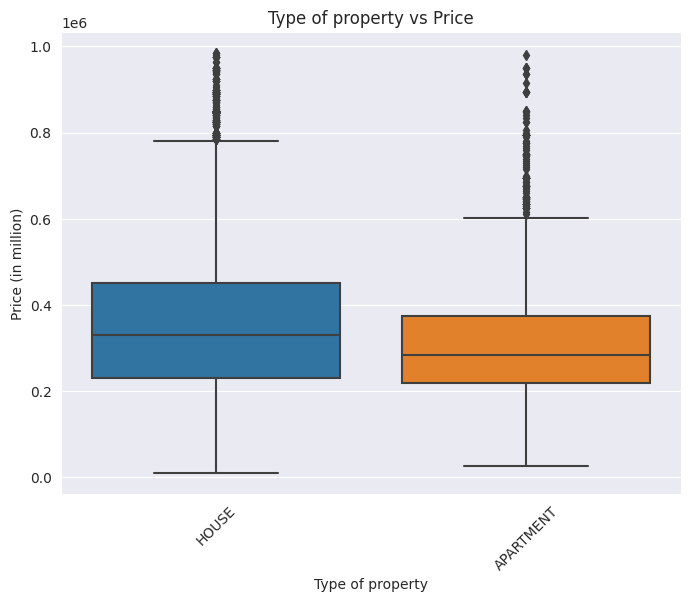

In [18]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'property_type', y = 'price',  data = df,ax=ax)
plt.title('Type of property vs Price')
plt.xlabel('Type of property')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

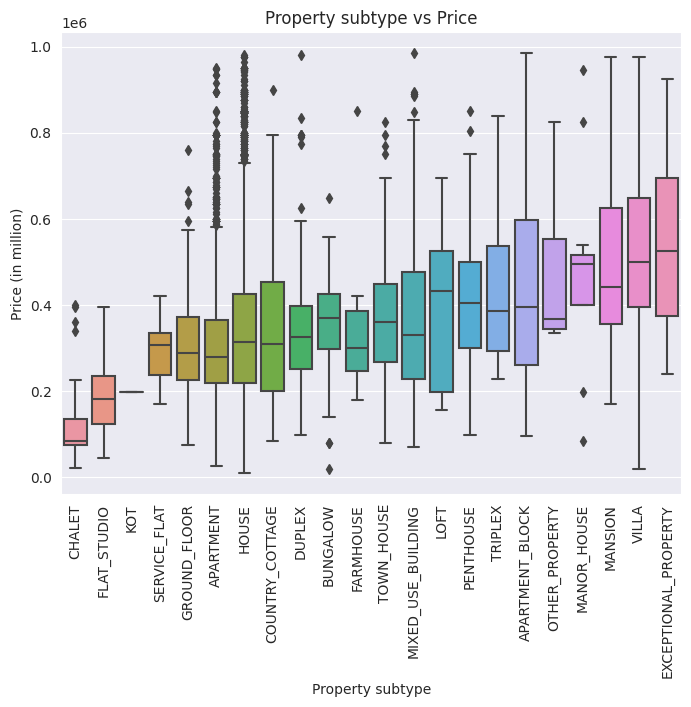

In [19]:
mean_prices = df.groupby('property_subtype')['price'].mean().sort_values(ascending=True)
sorted_categories = mean_prices.index.tolist()
df['property_subtype'] = pd.Categorical(df['property_subtype'], categories=sorted_categories, ordered=True)

fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'property_subtype', y = 'price',  data = df,ax=ax)
plt.title('Property subtype vs Price')
plt.xlabel('Property subtype')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Text(39.75172839506173, 0.5, 'Price in million euros')

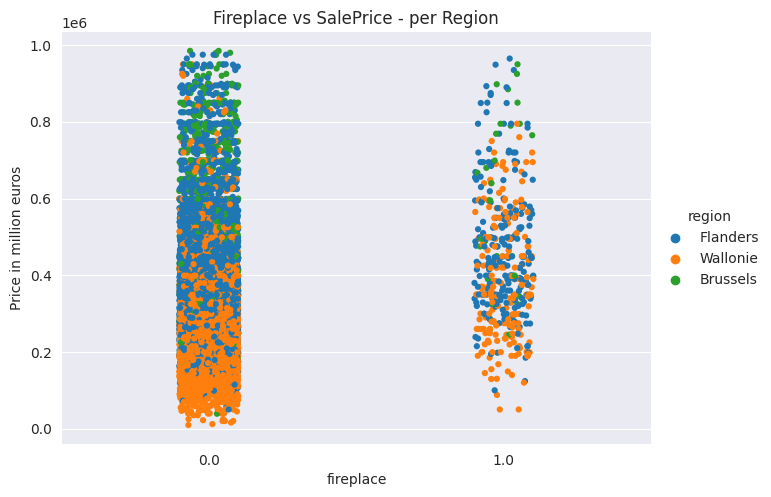

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=df,x='fireplace',y='price',
               size=4.5,aspect=1.35, hue='region')
plt.title('Fireplace vs SalePrice - per Region')
plt.ylabel('Price in million euros')

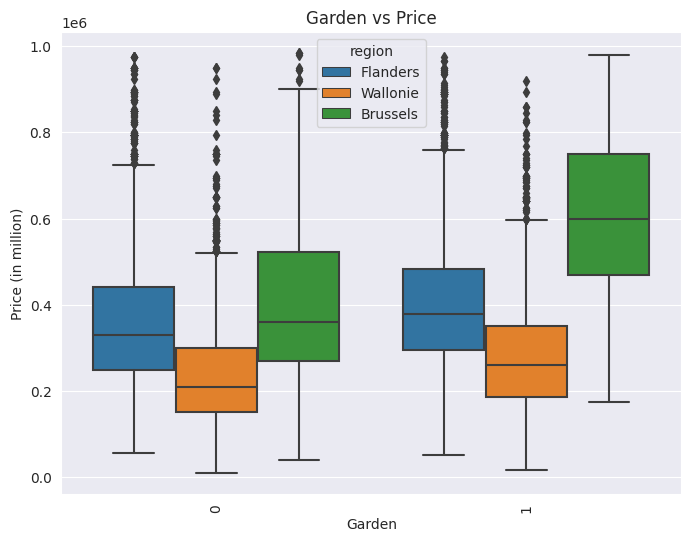

In [21]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'garden', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Garden vs Price')
plt.xlabel('Garden')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

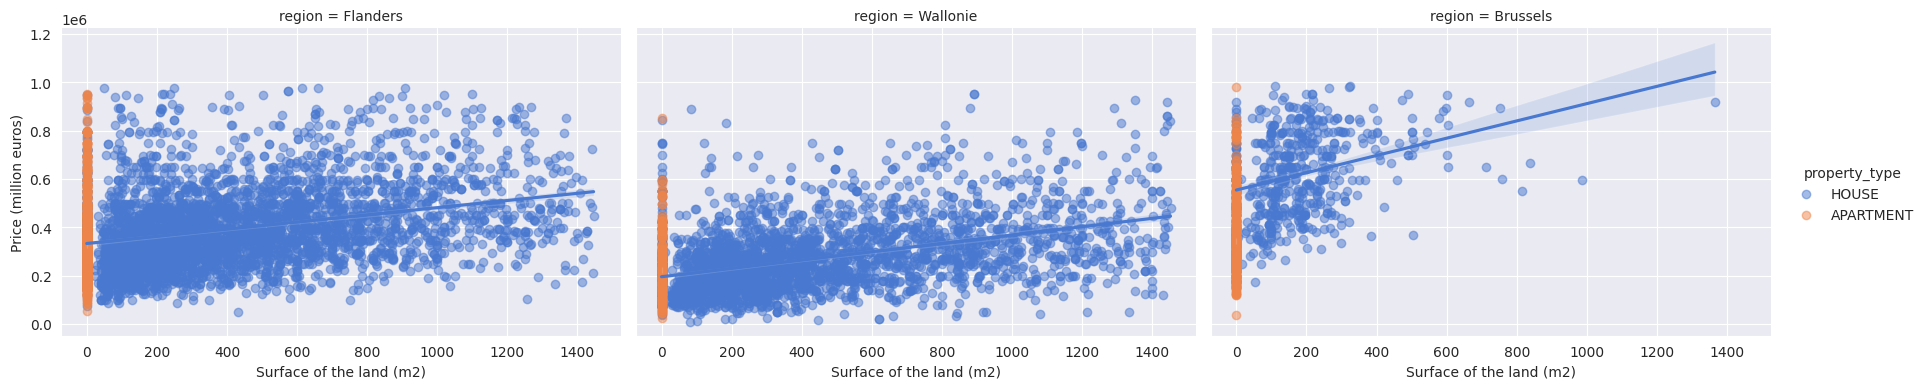

In [22]:
g = sns.FacetGrid(df, col="region", hue="property_type", height=4, aspect=1.5, palette='muted')

g.map(sns.regplot, "surface_land", "price", scatter_kws={"alpha": 0.5})
g.set_axis_labels("Surface of the land (m2)", "Price (million euros)")
#g.set(xticks=[0, 100, 200, 300, 400])
g.add_legend()

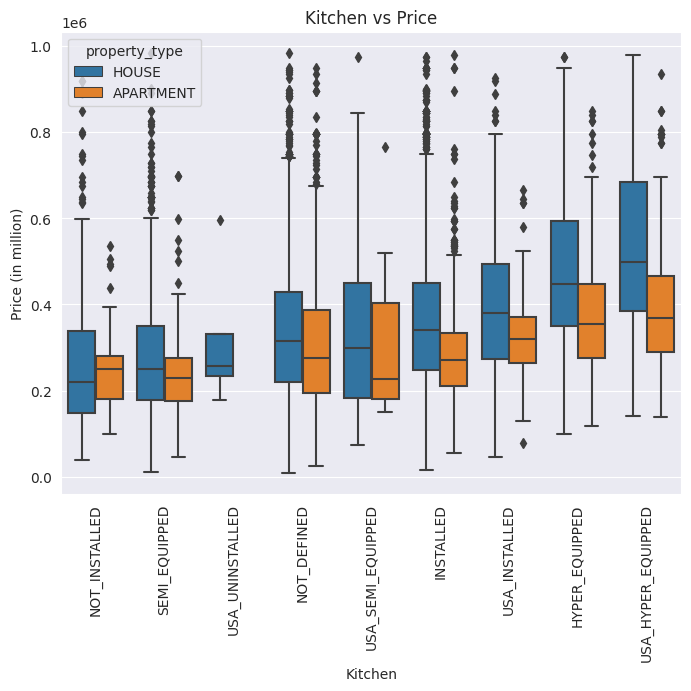

In [23]:
mean_prices = df.groupby('kitchen')['price'].mean().sort_values(ascending=True)
sorted_categories = mean_prices.index.tolist()
df['kitchen'] = pd.Categorical(df['kitchen'], categories=sorted_categories, ordered=True)

fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'kitchen', y = 'price',  data = df,ax=ax, hue='property_type')
plt.title('Kitchen vs Price')
plt.xlabel('Kitchen')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

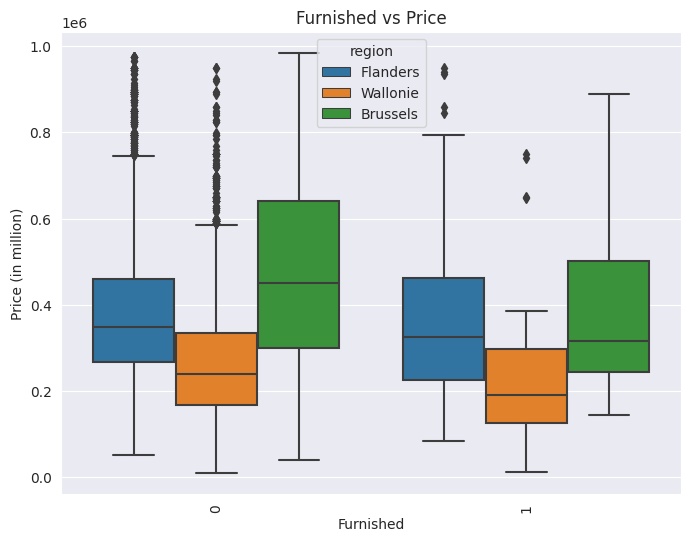

In [24]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'furnished', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Furnished vs Price')
plt.xlabel('Furnished')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

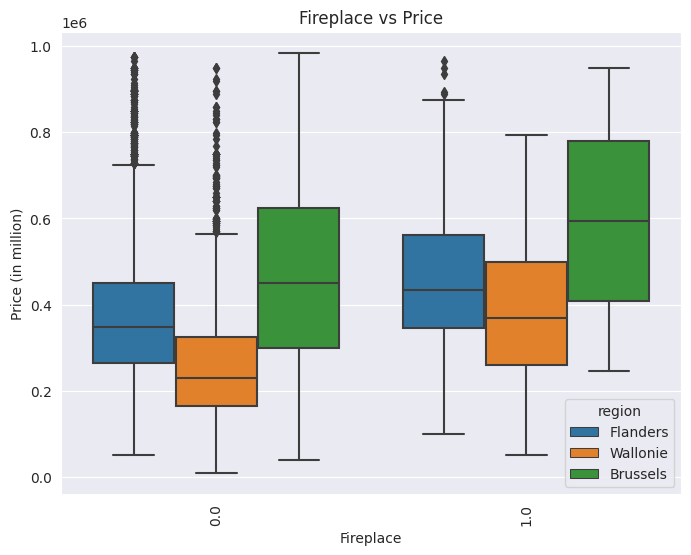

In [25]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'fireplace', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Fireplace vs Price')
plt.xlabel('Fireplace')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

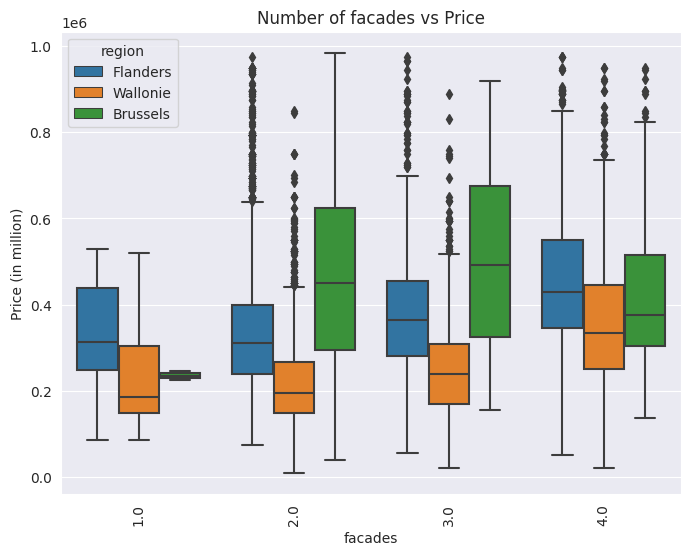

In [26]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'number_facades', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Number of facades vs Price')
plt.xlabel('facades')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

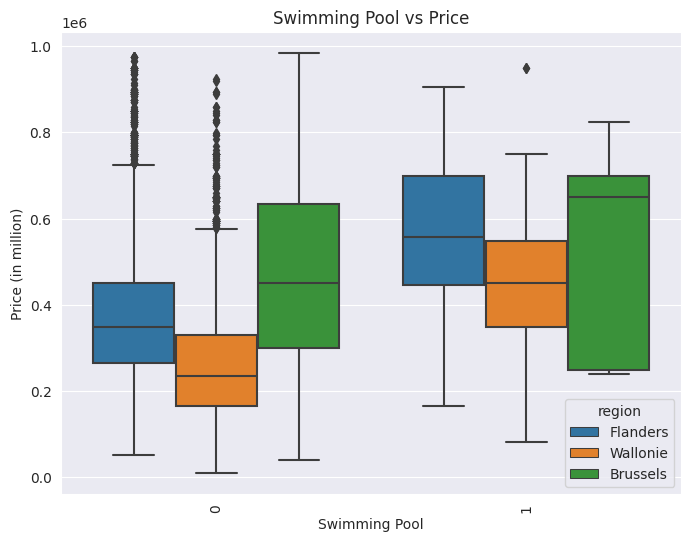

In [27]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'swimming_pool', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Swimming Pool vs Price')
plt.xlabel('Swimming Pool')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

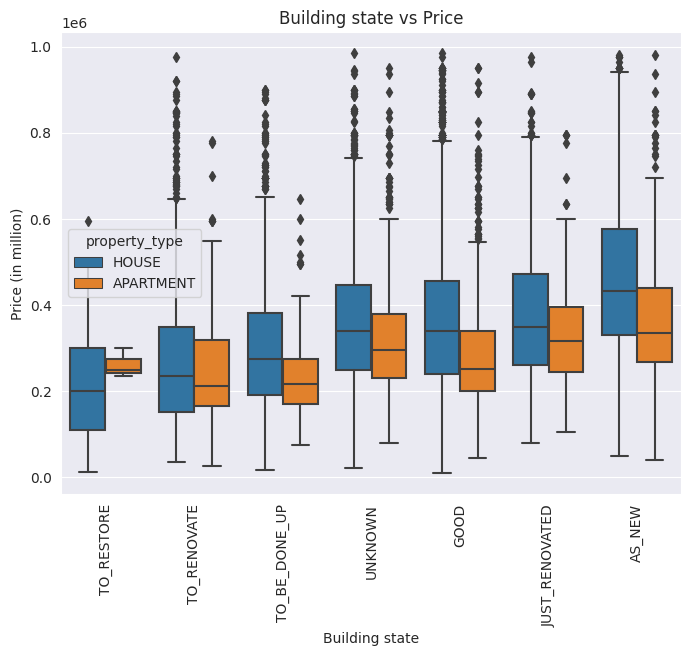

In [28]:
mean_prices = df.groupby('building_state')['price'].mean().sort_values(ascending=True)
sorted_categories = mean_prices.index.tolist()
df['building_state'] = pd.Categorical(df['building_state'], categories=sorted_categories, ordered=True)

fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'building_state', y = 'price',  data = df,ax=ax, hue='property_type')
plt.title('Building state vs Price')
plt.xlabel('Building state')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [29]:
df.columns

Index(['locality', 'property_type', 'property_subtype', 'price',
       'number_rooms', 'living_area', 'kitchen', 'furnished', 'fireplace',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'surface_land',
       'number_facades', 'swimming_pool', 'building_state', 'region',
       'province', 'latitude', 'longitude'],
      dtype='object')

## Adding the Price per square meter 

In [30]:
df_new = df['price']/df['living_area']

In [31]:
df_new.to_frame()

,0
0,2027.918782
1,1934.010152
2,2049.479167
3,1598.984772
4,1564.102564
...,...
9899,2672.619048
9900,3050.000000
9901,2672.619048
9902,3010.050251


In [32]:
df_coord = df[['latitude', 'longitude']]

In [33]:
df = pd.concat([df, df_new], axis=1)

In [34]:
df.rename(columns={0: 'price_per_area_m2'}, inplace=True)

In [35]:
df

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude,price_per_area_m2
0,Ham,HOUSE,HOUSE,399500.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0.0,461.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303,2027.918782
1,Ham,HOUSE,HOUSE,381000.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0.0,343.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303,1934.010152
2,Ham,HOUSE,HOUSE,393500.0,3.0,192.0,HYPER_EQUIPPED,0,0.0,0,...,0.0,392.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303,2049.479167
3,Ham,HOUSE,HOUSE,315000.0,3.0,197.0,NOT_INSTALLED,0,0.0,0,...,0.0,509.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303,1598.984772
4,Ham,HOUSE,HOUSE,305000.0,3.0,195.0,NOT_INSTALLED,0,0.0,0,...,0.0,453.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303,1564.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,Geraardsbergen Ophasselt,HOUSE,HOUSE,449000.0,3.0,168.0,HYPER_EQUIPPED,0,0.0,1,...,150.0,480.0,3.0,0,AS_NEW,Flanders,East Flanders,50.821858,3.897035,2672.619048
9900,Geraardsbergen Ophasselt,HOUSE,HOUSE,549000.0,3.0,180.0,HYPER_EQUIPPED,0,0.0,1,...,200.0,705.0,4.0,0,AS_NEW,Flanders,East Flanders,50.821858,3.897035,3050.000000
9901,Geraardsbergen Ophasselt,HOUSE,HOUSE,449000.0,3.0,168.0,HYPER_EQUIPPED,0,0.0,1,...,200.0,517.0,3.0,0,AS_NEW,Flanders,East Flanders,50.821858,3.897035,2672.619048
9902,Sint-Martens-Latem,HOUSE,HOUSE,599000.0,4.0,199.0,HYPER_EQUIPPED,0,0.0,1,...,0.0,1104.0,4.0,0,TO_RENOVATE,Flanders,East Flanders,51.020971,3.639755,3010.050251


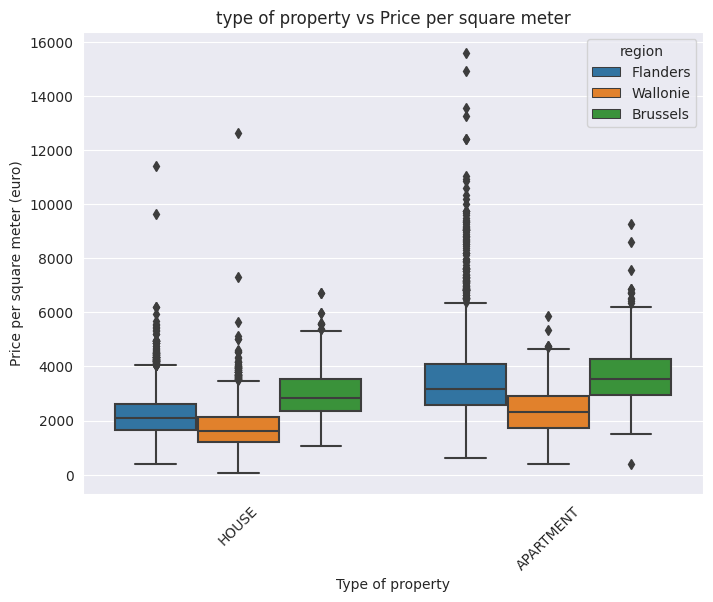

In [36]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'property_type', y = 'price_per_area_m2',  data = df,ax=ax, hue='region')
plt.title('type of property vs Price per square meter')
plt.xlabel('Type of property')
plt.ylabel('Price per square meter (euro)')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)